# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, ttest_ind

# Functions

In [2]:
def xy_units(total_units: list, x_units: int):
    if len(total_units)%x_units == 0:
        y_units = len(total_units)/x_units
    else:
        y_units = int(len(total_units)/x_units) + 1
    return x_units, y_units

# Importing Database

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/VD-git/cs-stone-fraud/main/source/dados.csv?token=GHSAT0AAAAAABRQJA2MNDR5KXLIO2Y656DWYQH6HJA")
df.loc[:, "id_subestacao"] = df.loc[:, "id_subestacao"].astype('object')

# EDA (Questão 01)

In [4]:
categorical_columns = [i for i,j in zip(df.columns, df.dtypes) if j == 'object']
numerical_columns = [i for i,j in zip(df.columns, df.dtypes) if j == 'int64']
df['range_temp'] = df['temperatura_maxima'] - df['temperatura_minima']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
id_subestacao           150000 non-null object
local_medidor           150000 non-null object
tipo_medidor            150000 non-null object
consumo_medio_mensal    150000 non-null int64
temperatura_maxima      150000 non-null int64
temperatura_minima      150000 non-null int64
numero_fases            150000 non-null object
classe_cliente          150000 non-null object
range_temp              150000 non-null int64
dtypes: int64(4), object(5)
memory usage: 10.3+ MB


In [6]:
df.describe()

,consumo_medio_mensal,temperatura_maxima,temperatura_minima,range_temp
count,150000.000000,150000.00000,150000.000000,150000.000000
mean,277.815907,39.48852,16.986147,22.502373
std,102.485447,5.77391,4.319801,7.197101
min,100.000000,30.00000,10.000000,6.000000
25%,190.000000,34.00000,13.000000,17.000000
50%,278.000000,39.00000,17.000000,23.000000
75%,365.000000,44.00000,21.000000,28.000000
max,549.000000,49.00000,24.000000,39.000000


In [7]:
df.isnull().sum()

id_subestacao           0
local_medidor           0
tipo_medidor            0
consumo_medio_mensal    0
temperatura_maxima      0
temperatura_minima      0
numero_fases            0
classe_cliente          0
range_temp              0
dtype: int64

In [8]:
df.nunique()

id_subestacao            49
local_medidor             3
tipo_medidor              2
consumo_medio_mensal    450
temperatura_maxima       20
temperatura_minima       15
numero_fases              3
classe_cliente            2
range_temp               34
dtype: int64

- De início já é possível ver que não há a presença de valores nulos para serem tratados posteriormente;
- Além disso, vemos que algumas variáveis podem ser tratadas como categóricas e outras como numéricas, isso pela quantidade de valores distintos/únicos e por sua tipologia.
- Categóricas: id_subestacao (por ser id), local_medidor, tipo_medidor, numero_fases, classe_cliente;
- Númericas: consumo_medio_mensal, temperatura_maxima, temperatura_minima.

# Q01-Parte 1:

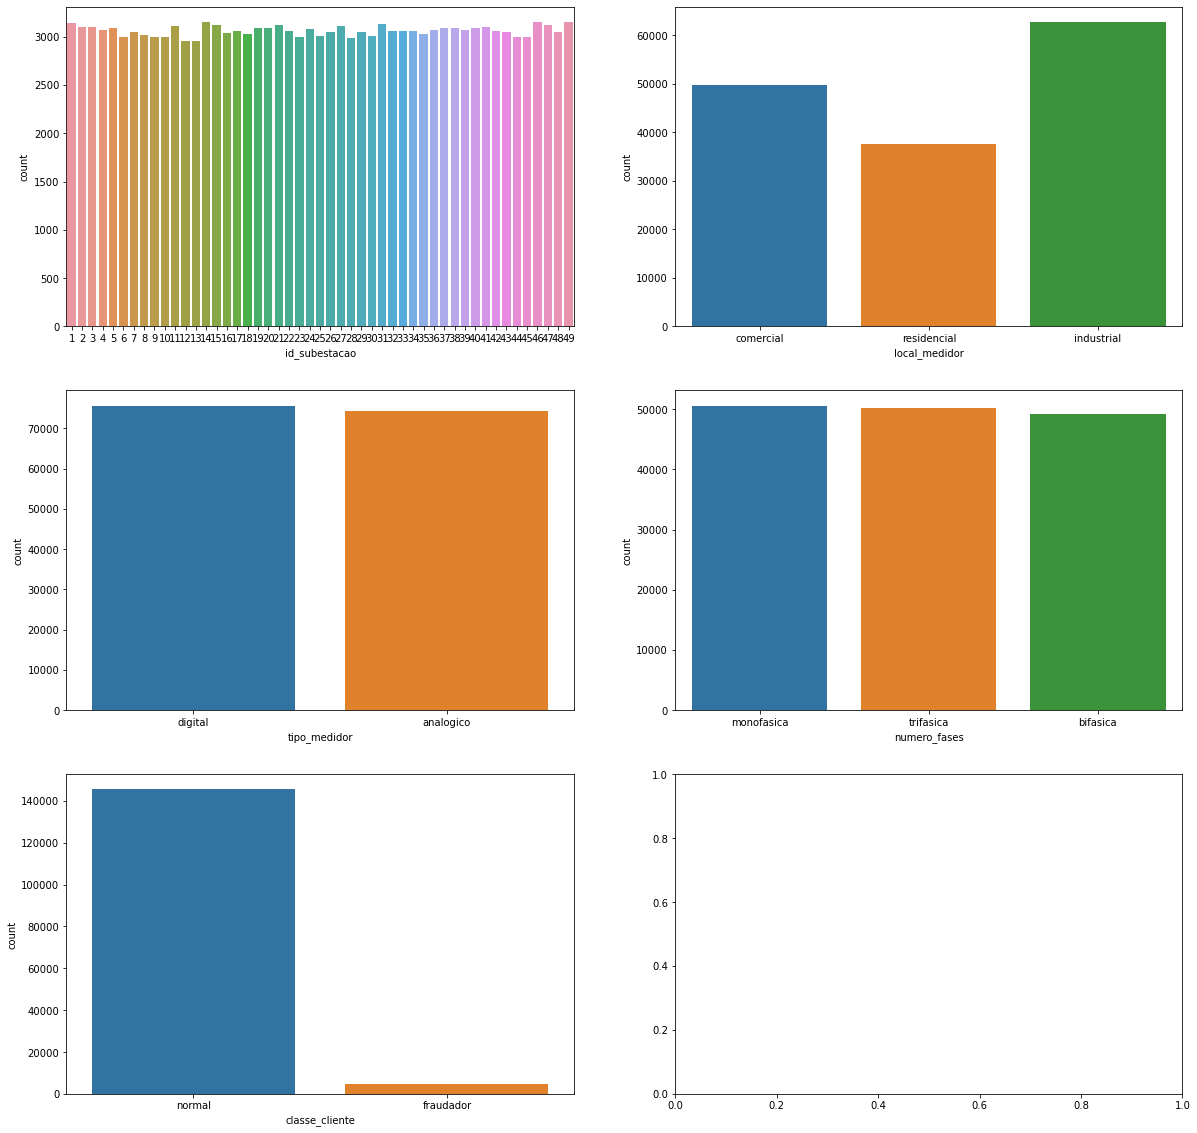

In [9]:
x, y = xy_units(categorical_columns, 2)
fig, axs = plt.subplots(y, x)
fig.set_figwidth(20), fig.set_figheight(20)
k = 0
for i in range(y):
    for j in range(x):
        if k < len(categorical_columns):
            sns.countplot(x = categorical_columns[k], ax=axs[i][j], data = df, );
            k += 1

- Aqui é muito importante a análise para depois realizar o treino do modelo, a fim de evitar viéses de variáveis desbalanceadas;
- Isso para não termos um dummy classifier performando com 90-95% de acurácia, achando que ele é um modelo bom;
- Isso pode acontecer aqui devido a um grande desbalanceio dos dados quando falamos das labels de não-fraudador e fraudador, para as demais variáveis categóricas há um balancete adequado;
- Note que se classificar tudo como não fraudador, terei uma acurácia de ~ 96,99 %.

# Q01-Parte 2:

(275.0, 280.0)

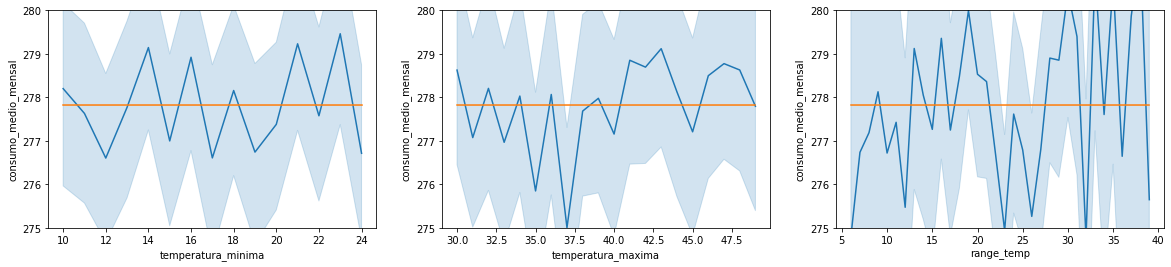

In [10]:
fig, axs = plt.subplots(1,3)
fig.set_figwidth(20)

sns.lineplot(x = df['temperatura_minima'], y = df['consumo_medio_mensal'], ax=axs[0])
sns.lineplot(x = df['temperatura_minima'], y = df['consumo_medio_mensal'].mean(), ax=axs[0])
axs[0].set_ylim([275,280])

sns.lineplot(x = df['temperatura_maxima'], y = df['consumo_medio_mensal'], ax=axs[1])
sns.lineplot(x = df['temperatura_maxima'], y = df['consumo_medio_mensal'].mean(), ax=axs[1])
axs[1].set_ylim([275,280])

sns.lineplot(x = df['range_temp'], y = df['consumo_medio_mensal'], ax=axs[2])
sns.lineplot(x = df['range_temp'], y = df['consumo_medio_mensal'].mean(), ax=axs[2])
axs[2].set_ylim([275,280])

In [11]:
print(f"p-value (temp_min & consume): {linregress(df['temperatura_minima'], df['consumo_medio_mensal']).pvalue:.2f}")
print(f"p-value (temp_max & consume): {linregress(df['temperatura_maxima'], df['consumo_medio_mensal']).pvalue:.2f}")
print(f"p-value (temp_range & consume): {linregress(df['range_temp'], df['consumo_medio_mensal']).pvalue:.2f}")

p-value (temp_min & consume): 0.78
p-value (temp_max & consume): 0.19
p-value (temp_range & consume): 0.38


- Interessante notar aqui que o esperado de dias quentes, ou dias frios, ou dias com uma alta variação de temperatura não interferem de forma estatisticamente relevante no consumo_medio_mensal, o que de antemão podia ser esperado pelo uso de ar condicionado e/ou aquecedor;
- Essas, quando comparadas com o consumo mensal apresentam um p-value superior a 0.05, não conseguindo rejeitar a hipótese que são iguais (tomando um IC de 95 %).

# Q01-Parte 3:

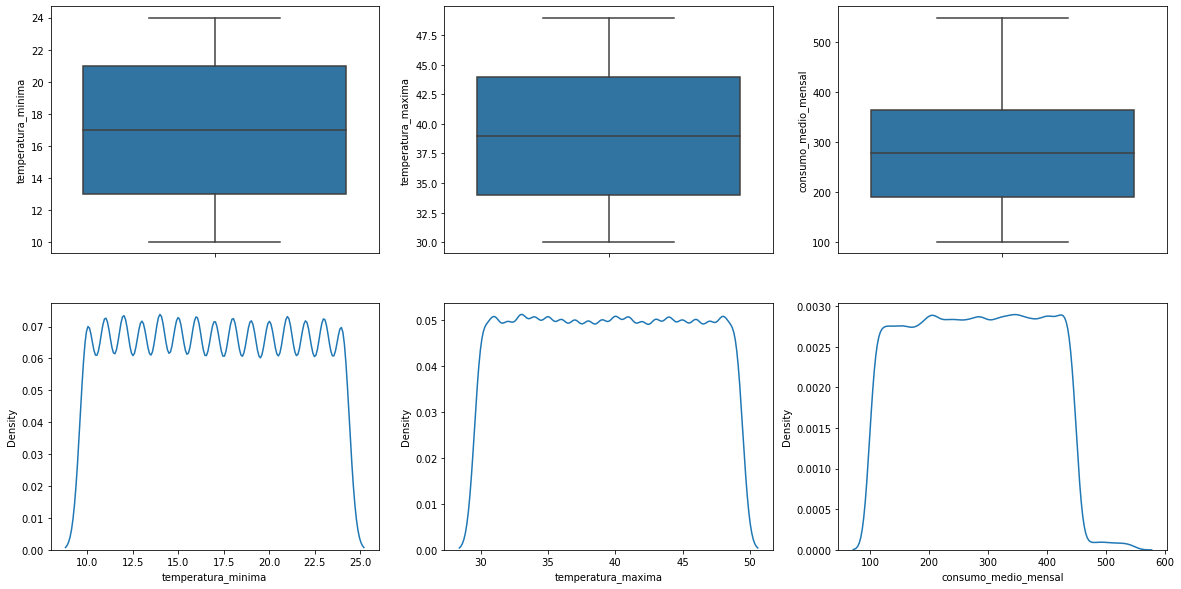

In [12]:
fig, axs = plt.subplots(2,3)
fig.set_figwidth(20), fig.set_figheight(10)

sns.boxplot(y = df['temperatura_minima'], ax=axs[0][0])
sns.boxplot(y = df['temperatura_maxima'], ax=axs[0][1])
sns.boxplot(y = df['consumo_medio_mensal'], ax=axs[0][2])

sns.kdeplot(df['temperatura_minima'], ax=axs[1][0])
sns.kdeplot(df['temperatura_maxima'], ax=axs[1][1])
sns.kdeplot(df['consumo_medio_mensal'], ax=axs[1][2])

- Assim como foi feito para variáveis categóricas, aqui foi avaliado se há um bom balanceio entre as variáveis numéricas, se há a presença de outliers, entre outros;
- É visto um comportamento Ok para as variáveis, só um pouco suspeito quando vemos consumo mensal, aquela pequena amostra com consumo maior que 450, é levementemente desproporcional, por isso a olharemos com maior detalhe adiante.

# Q01-Parte 4:

In [13]:
df_dummies = pd.get_dummies(df[categorical_columns[1:]],prefix=categorical_columns[1:], columns = categorical_columns[1:], drop_first = False)
df_final = pd.concat([df_dummies, df[numerical_columns]], axis = 1)

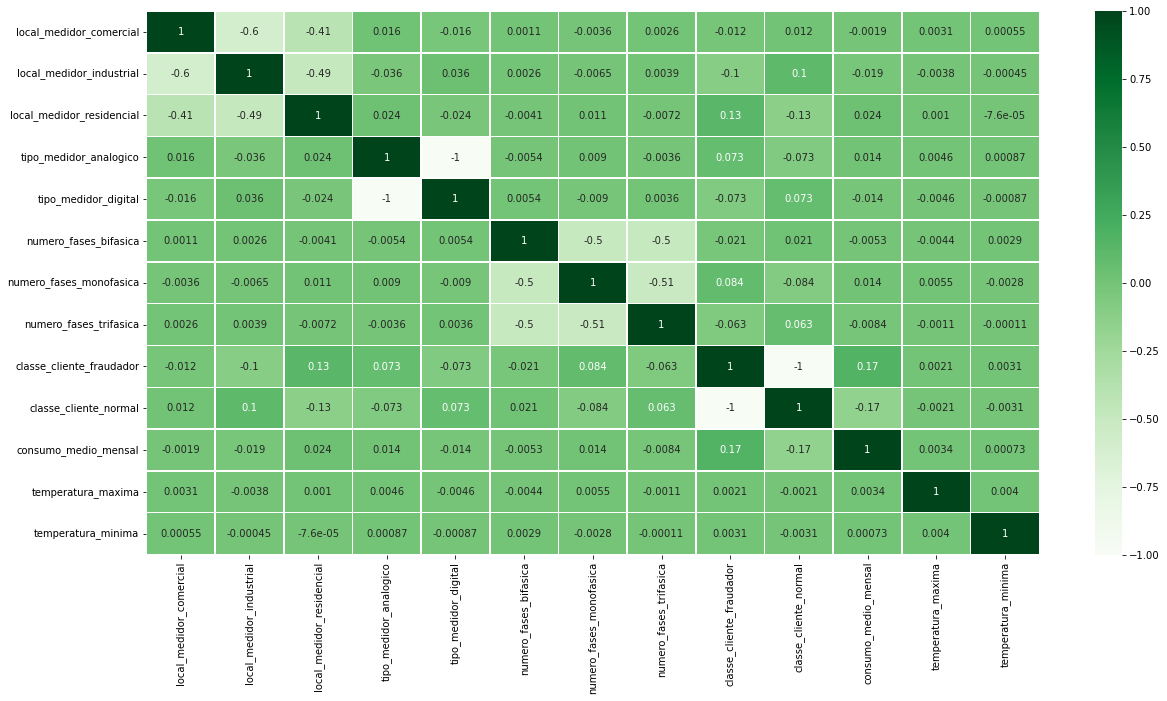

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_final.corr(),cmap='Greens', annot=True, linewidths=.5, ax=ax)

In [15]:
cons_fraud = df_final[df_final['classe_cliente_fraudador'] == 1]['consumo_medio_mensal']
cons_normal = df_final[df_final['classe_cliente_normal'] == 1]['consumo_medio_mensal']

In [16]:
ttest_ind(cons_normal, cons_fraud)

Ttest_indResult(statistic=-65.57567720266269, pvalue=0.0)

((100.0, 550.0), Text(0.5, 0, 'Normal'))

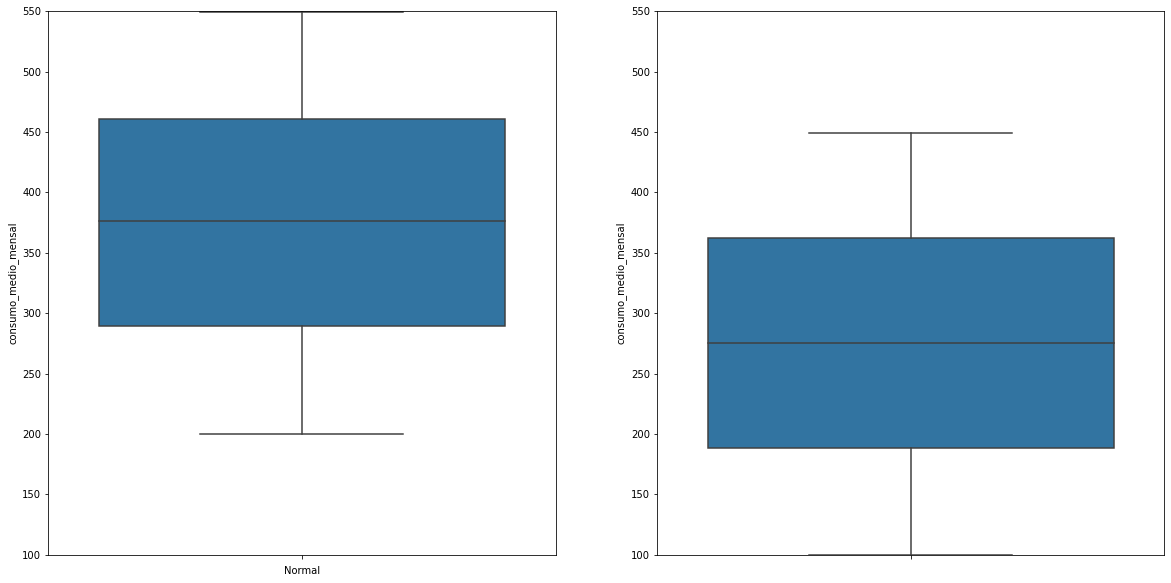

In [17]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(20), fig.set_figheight(10)

sns.boxplot(y = cons_fraud, ax=axs[0])
sns.boxplot(y = cons_normal, ax=axs[1])

axs[0].set_ylim([100,550]), axs[0].set_xlabel("Fraud")
axs[1].set_ylim([100,550]), axs[0].set_xlabel("Normal")

C:\Users\VICTOR\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


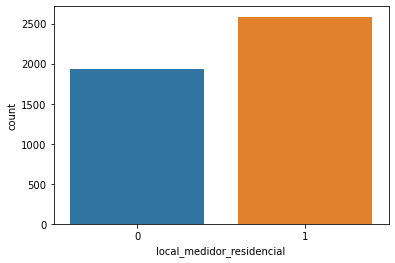

In [18]:
sns.countplot(df_final[df_final["classe_cliente_fraudador"] == 1]["local_medidor_residencial"])

- Para uma melhor avaliação, principalmente quando falamos de consumo mensal, que já apresentou um comportamento anômalo anteriormente, foi construído o correlograma para avaliar as relações entre as variáveis;
- Quando falamos de fraudador, vemos uma relação elevada com pessoas que moram em residências e com consumo mensal mais elevado, correlações de 0.15 e 0.17, respectivamente, confirmando a análise feita anteriormente sobre o comportamento anômalo de consumo mensal, linkando esse com fraudes;
- Para podermos confirmar estatisticamente essa análise, foi realizado um teste de hipótese que o consumo mensal de fraudadores e não fraudadores era o mesmo. Apresentado um p-value menor que 0.05 (IC de 95 %), é possível rejeitar a hipótese que são iguais.